# Week 6 Reading Material (notebook 1 of 2)

In this notebook, we'll look at a class called Gaussian. If you have never heard of/worked with Gaussian Distributions (aka normal distribution), I recommend reading/watching these links first:

* https://www.youtube.com/watch?v=xgQhefFOXrM
* https://www.youtube.com/watch?v=jKwiiSK68lE
* https://www.alanzucconi.com/2015/09/09/understanding-the-gaussian-distribution/

NOTE: WITHOUT THE MATH, THE EXAMPLE BELOW WILL NOT MAKE ANY SENSE. PROCEED ONLY AFTER REVIEWING THE CONTENT ABOVE

The Gaussian class below will serve as an example on how you can create classes to represent mathematical concepts as objects. This example will allow you to think of python objects as abstract concepts with little to no ties to any real world object. Don't worry if this is difficult to understand at first. With due time, it will become clearer. It was hard for all of us when we first learned it, except for maybe Bjarne Stroustrup. 

Make sure you read each line of code carefully and try to make sense of it. Let's jump right in...

In [14]:
import math
import matplotlib.pyplot as plt


class Gaussian():
    """
    Gaussian Distribution class for calculating and visualizing a Gaussian distribution
    
    Attributes:
        mean (float) - represents the mean value of the distribution
        stdev (float) - represents the standard deviation of the distribution
        data_list (list of floats) - list of floats extracted from a data file
    """
    
    def __init__(self, mu = 0, sigma = 1):
        self.mean = mu
        self.stdev = sigma
        self.data = [] 
        
    def calculate_mean(self):
        """
        Method to calculate the mean of the data set
        
        Args:
            None
        Returns:
            float - mean of the dataset
        """
        avg = 1.0 * sum(self.data) / len(self.data)
        self.mean = avg
        return self.mean
    
    def calculate_stdev(self, sample=True):
        """
        Method to calculate standard deviation of a dataset
        
        Args:
            sample (bool) - does the dataset represent sample or the population
        Returns:
            float - standard deviation of the dataset
        """
        if sample:
            n = len(self.data) - 1
        else:
            n = len(self.data)
            
        mean = self.mean
        sigma = 0
        
        for d in self.data:
            sigma += (d-mean)**2
        sigma = math.sqrt(sigma/n)
        self.stdev = sigma
        
        return self.stdev
    
    def read_data_file(self, file_name, sample=True):
        """
        Method to read data from a file. The file should have one number (float) per line.
        The numbers are stored in the data attribute. The mean and standard deviation are
        calculated after reading data from the file. 
        
        Args:
            file_name (string) - name of the file to read data from. 
        
        Returns:
            Nothing
        """
        
        with open(file_name) as f: 
            data_list = []
            line = f.readline()
            while line:
                data_list.append(float(line))
                line = f.readline()
            f.close()
            
            self.data = data_list
            self.mean = self.calculate_mean()
            self.stdev = self.calculate_stdev(sample)
            
    def plot_histogram(self):
        """
        Method to plot a histogram of data using matplotlib pyplot library. 
        
        Args:
            None
            
        Returns:
            Nothing
        """
        
        plt.hist(self.data)
        plt.title('Histogram')
        plt.xlabel('Data')
        plt.ylabel('Count')
        
    
    def probability_density_function(self, x):
        """
        Method to calculate probability density function (pdf) for gaussian distribution.
        
        Args: 
            x (float) - point for calculating pdf
            
        Returns:
            float - pdf output
        """
        
        return (1.0 / (self.stdev * math.sqrt(2*math.pi))) * math.exp(-0.5*((x - self.mean) / self.stdev) ** 2)
    
    def plot_histogram_pdf(self, n_spaces=50):
        """
        Method to plot the normalized histogram of the data and plot 
        pdf along the same range
        
        Args:
            n_spaces (int) - number of data points
            
        Returns:
            list: x-values for the pdf plot
            list: y-values for the pdf plot
        """
        
        mu = self.mean
        sigma = self.stdev
        
        min_range = min(self.data)
        max_range = max(self.data)
        
        # calculate the interval between x values
        interval = 1.0 * (max_range - min_range) / n_spaces
        
        x = []
        y = []
        
        # calculate x values to visualize
        for i in range(n_spaces):
            tmp = min_range + interval * i
            x.append(tmp)
            y.append(self.probability_density_function(tmp))
            
        # render the plots
        figure, axes = plt.subplots(2, sharex=True)
        figure.subplots_adjust(hspace=.5)
        axes[0].hist(self.data, density=True)
        axes[0].set_title('Normed histogram of data')
        axes[0].set_ylabel('Density')
        
        axes[1].plot(x, y)
        axes[1].set_title('Normal Distribution for \n sample mean and sample standard deviation')
        axes[1].set_ylabel('Density')
        plt.show()
        
        return x, y


Let's take a closer look at the code above. 

* The code above uses doctrings to clearly document what the class represents, it's attributes, and methods. Individual methods also use docstrings to state what the method does. 
* The __init__ function, aka constructor, sets the mean to 0 and standard deviation to 1, when it doesn't explicitely receive these values. 
* read_data_file method calls the calculate_mean() and calculate_stdev() methods on object self. The self object not only gives you access to the class attributes but also to the class methods. 
* We imported matplotlib.pyplot library. This is commonly used library for visualizing data as graphs/plots.

Did you also make these observations as you were reading through the code? 

I now have a task for you to complete. 

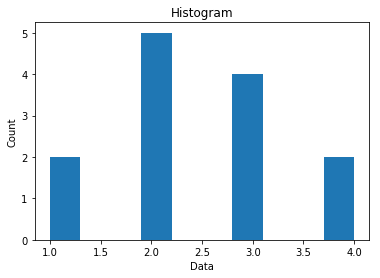

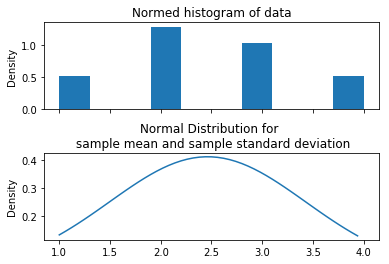

2.4615384615384617

In [15]:
# Create an object of type Gaussian, feed it a text file of numbers and have the 
#  object calculate mean, standard deviation. Also, plot a histogram of the distribution.
file = "/Users/kintienmalik/Documents/AML300/Student Directory/Kintien/numbers.txt"
g = Gaussian()
g.read_data_file(file)
g.plot_histogram()
g.plot_histogram_pdf()
plt.show()
g.calculate_mean()